In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.options.display.max_columns=1000
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [3]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [4]:
df.shape

(919288, 20)

In [5]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [6]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [7]:
model = LogisticRegression()

In [8]:
fn_over = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)

In [9]:
X = df[fn_over]
y = df['is_ninjago']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [11]:
df_train = pd.concat([pd.DataFrame(X_train, columns=fn_over), pd.DataFrame(y_train, columns=['is_ninjago'])], axis=1)

In [12]:
df_test = pd.concat([pd.DataFrame(X_test, columns=fn_over), pd.DataFrame(y_test, columns=['is_ninjago'])], axis=1)

In [13]:
print(df_train.shape)
print(df_test.shape)

(827359, 11)
(91929, 11)


In [14]:
df_grouped_train = df_train.groupby('is_ninjago')

df_grouped_train.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
774631,2014,368,7,19,15,1,0,11,5,59,0
417226,2013,284,7,16,0,1,0,5,5,45,0
414960,2010,631,6,20,0,1,0,5,5,57,0
896798,2008,842,6,33,0,2,0,4,5,12,0
591153,2007,974,6,19,70,3,0,6,13,53,0
555268,2016,754,7,17,2,3,0,4,5,11,1
575778,2015,361,7,15,19,1,0,5,3,27,1
576490,2015,2030,7,18,0,1,0,6,5,54,1
612760,2020,1017,7,23,27,8,0,4,4,33,1
567503,2019,364,7,11,0,2,0,5,5,43,1


In [15]:
print(df_grouped_train.size())

is_ninjago
0    795565
1     31794
dtype: int64


In [16]:
list(df_grouped_train)[0][1]

lengths = []

for is_ninjago, group in df_grouped_train:
    lengths.append(group.shape[0])
    
print(lengths)

[795565, 31794]


In [17]:
dfs_train = list()

for is_ninjago, group in df_grouped_train:
    dfs_train.append(group.sample(max(lengths), replace=True))
    
dfs_train

[        year  num_parts  set_num_len  set_name_len  color_id  quantity  \
 261325  2018        648            7            38         0         1   
 339820  2004       1200            6            15        14         2   
 179956  1969         43            5            20        15         4   
 698556  2010        502            6            16         0         1   
 644598  2015        251            7             3        28         3   
 ...      ...        ...          ...           ...       ...       ...   
 299832  2021         57            7            19       322         1   
 167739  2018        597            7            19        15         1   
 263106  2017        712            7            22       322         3   
 658844  2017        774            7            13       297         1   
 871735  1993         84            6             3         4         1   
 
         is_trans  part_num_len  color_name_len  part_name_len  is_ninjago  
 261325         0    

In [18]:
df_balancedbyover = pd.concat(dfs_train)
df_balancedbyover.head()

,year,num_parts,set_num_len,set_name_len,color_id,quantity,is_trans,part_num_len,color_name_len,part_name_len,is_ninjago
261325,2018,648,7,38,0,1,0,5,5,19,0
339820,2004,1200,6,15,14,2,0,4,6,11,0
179956,1969,43,5,20,15,4,0,8,5,52,0
698556,2010,502,6,16,0,1,0,5,5,46,0
644598,2015,251,7,3,28,3,0,4,8,11,0


In [19]:
df_balancedbyover.shape

(1591130, 11)

In [20]:
hyper_table_df_grouped = list()
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])

    #train_scores = []
    #test_scores = []

    #for is_ninjago, group in df_balancedbyover.groupby('is_ninjago'):
    #    train_scores.append(model.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago']))
        
    #for is_ninjago, group in df_test.groupby('is_ninjago'):
    #    test_scores.append(model.score(df_test[fn_over], df_test['is_ninjago']))
    
    s_train = model.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model.score(df_test[fn_over], df_test['is_ninjago'])
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         #test_score_0=test_scores[0], 
                         #test_score_1=test_scores[1],
                         #train_score_0=train_scores[0],
                         #train_score_1=train_scores[1],
                         model=model, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows=df_balancedbyover[fn_over].shape[0], 
                         last_feature=fn_over[-1]))

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:53<00:19,  9.51s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [01:08<00:11, 11.16s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [21]:
model_rf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)

In [22]:
fn_over = list()
for i, name in tqdm(enumerate(df_balancedbyover.columns), total=len(df_balancedbyover.columns)-1):
    if i > 100:
        break
    if name in target_names:
        continue
    fn_over.append(name)
    model_rf.fit(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    
    #train_scores = []
    
    #for is_ninjago, group in df_balancedbyover.groupby('is_ninjago'):
    #    train_scores.append(model_rf.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago']))
        
    #test_scores = []

    #for is_ninjago, group in df_test.groupby('is_ninjago'):
    #    test_scores.append(model_rf.score(df_test[fn_over], df_test['is_ninjago']))
        
    s_train = model_rf.score(df_balancedbyover[fn_over], df_balancedbyover['is_ninjago'])
    s_test = model_rf.score(df_test[fn_over], df_test['is_ninjago'])
    
    hyper_table_df_grouped.append(dict(sample='over', 
                         desc=str(fn_over), 
                         train_score=s_train, 
                         test_score=s_test, 
                         #test_score_0=test_scores[0], 
                         #test_score_1=test_scores[1],
                         #train_score_0=train_scores[0],
                         #train_score_1=train_scores[1], 
                         model=model_rf, 
                         num_features=df_balancedbyover[fn_over].shape[1], 
                         num_rows=df_balancedbyover[fn_over].shape[0], 
                         last_feature=fn_over[-1]))

11it [13:00, 70.98s/it]                                                                                                


In [23]:
ht_dfg_over = pd.DataFrame(hyper_table_df_grouped).sort_values('test_score', ascending=False)
ht_dfg_over

,sample,desc,train_score,test_score,model,num_features,num_rows,last_feature
13,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999514,0.999054,"(DecisionTreeClassifier(max_features='auto', r...",4,1591130,set_name_len
14,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999762,0.998890,"(DecisionTreeClassifier(max_features='auto', r...",5,1591130,color_id
15,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999841,0.998466,"(DecisionTreeClassifier(max_features='auto', r...",6,1591130,quantity
16,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999841,0.997901,"(DecisionTreeClassifier(max_features='auto', r...",7,1591130,is_trans
18,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999906,0.997596,"(DecisionTreeClassifier(max_features='auto', r...",9,1591130,color_name_len
19,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999991,0.996334,"(DecisionTreeClassifier(max_features='auto', r...",10,1591130,part_name_len
17,over,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999906,0.995910,"(DecisionTreeClassifier(max_features='auto', r...",8,1591130,part_num_len
12,over,"['year', 'num_parts', 'set_num_len']",0.994790,0.989829,"(DecisionTreeClassifier(max_features='auto', r...",3,1591130,set_num_len
11,over,"['year', 'num_parts']",0.991948,0.984270,"(DecisionTreeClassifier(max_features='auto', r...",2,1591130,num_parts
1,over,"['year', 'num_parts']",0.546348,0.739310,LogisticRegression(),2,1591130,num_parts


10


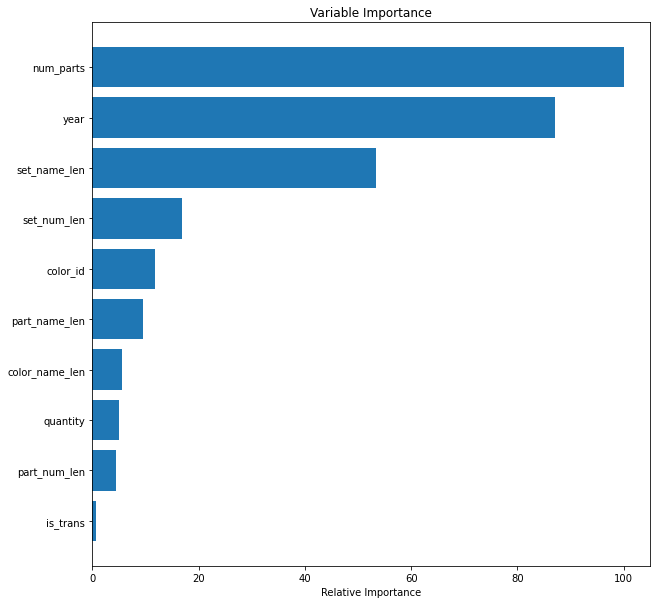

In [24]:
import matplotlib.pyplot as plt
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_balancedbyover[fn_over].columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [25]:
ht_dfg_over.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_dfg_over.csv', index=False)